<a href="https://colab.research.google.com/github/HalyshAnton/IT-Step-Pyton-AI/blob/main/module2/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Продаж велосипедів

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>


## Імпорт модулів

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Завантаження даних

In [113]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

sales.drop(columns=["Year"], inplace=True)


## Знайомство з даними

In [114]:
sales.head()

,Date,Day,Month,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [115]:
# назви стовпчиків до нижнього регістру
sales.columns = sales.columns.str.lower()

In [116]:
sales.shape

(113036, 17)

In [117]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113036 entries, 0 to 113035
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              113036 non-null  datetime64[ns]
 1   day               113036 non-null  int64         
 2   month             113036 non-null  object        
 3   customer_age      113036 non-null  int64         
 4   age_group         113036 non-null  object        
 5   customer_gender   113036 non-null  object        
 6   country           113036 non-null  object        
 7   state             113036 non-null  object        
 8   product_category  113036 non-null  object        
 9   sub_category      113036 non-null  object        
 10  product           113036 non-null  object        
 11  order_quantity    113036 non-null  int64         
 12  unit_cost         113036 non-null  int64         
 13  unit_price        113036 non-null  int64         
 14  prof

## Аналіз числових ознак

### Основні статистичні характеристики

Середнє арифметичне(математичне сподівання) `mean`. Можна вважати типовим представником

In [118]:
sales['unit_cost'].mean()

267.296365759581

Якщо дані мають аномально великі чи малі значення(викиди) то кращим типовим представником буде медіана `median`. Це число яке є більшим рівно за половину даних.

Стійкість характеристики до викидів називають робастністю (robust)

In [119]:
median_cost = sales['unit_cost'].median()
median_cost

9.0

In [120]:
# частка даних менших за медіану
(sales['unit_cost'] < median_cost).mean()

0.4776000566191302

Також важливими є квантилі `quantile`: числа які більші рівно за певну частку даних. Найчастіше беруть перший(>25%) та третій(>75%)

In [121]:
q_1 = sales['unit_cost'].quantile(q=0.25)
q_1

2.0

In [122]:
# частка даних менших за медіану
(sales['unit_cost'] <= q_1).mean()

0.317633320358116

Окрім типового представника, важливим є те наскільки дані "сконцентровані" навколо нього. Для цього є дві характеристики: дисперсія `var` та стандартне відхилення `std`

<img src="https://sp-ao.shortpixel.ai/client/to_auto,q_lossless,ret_img,w_1024/https://dataindependent.com/wp-content/uploads/2021/12/Screen-Shot-2020-09-04-at-7.46.16-AM-1024x599-1.png"
style="width:200px; float: right; margin: 0 20px 20px 20px;"></img>

In [123]:
sales['unit_cost'].var()

302319.05848407175

In [124]:
sales['unit_cost'].std()

549.8354831075126

In [125]:
print(f"корінь квадратний з дисперсії: {np.sqrt(sales['unit_cost'].var())}")
print(f"стандартне відхилення:         {sales['unit_cost'].std()}")

корінь квадратний з дисперсії: 549.8354831075126
стандартне відхилення:         549.8354831075126


Усі ці характеристики можна отримати за допомогою методу `describe`

In [126]:
sales['unit_cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: unit_cost, dtype: float64

In [127]:
sales.describe()

,day,customer_age,order_quantity,unit_cost,unit_price,profit,cost,revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


### Основні графіки

Гістограма показує кількість точок що належить конкретному проміжку. Має вигляд стовпчиків.

Text(0.5, 0, 'dollars')

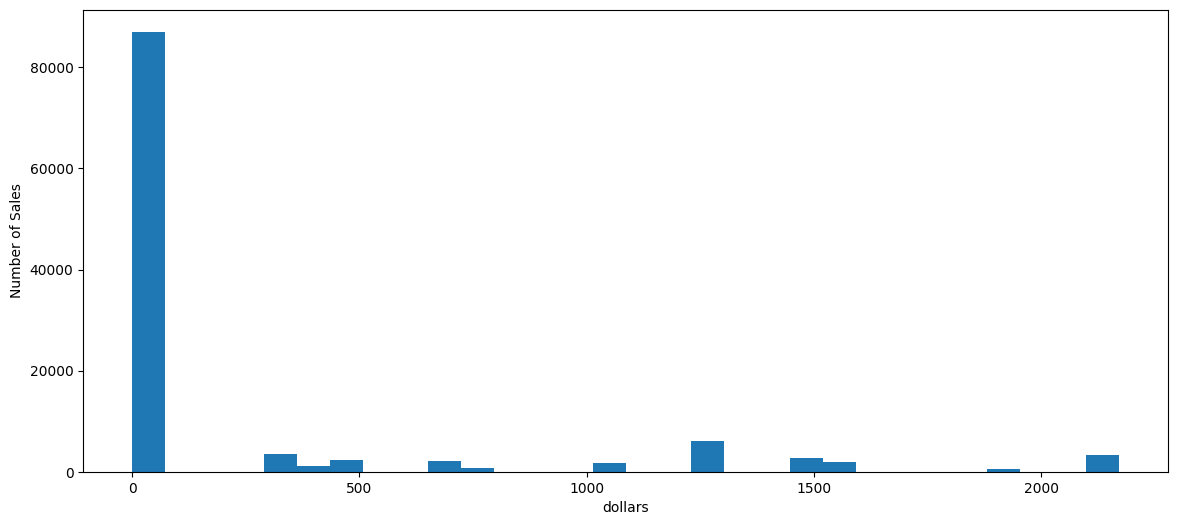

In [128]:
ax = sales['unit_cost'].plot(kind='hist',    # тип діаграми hist
                             bins=30,        # кількість стовпчиків
                             figsize=(14,6)  # розмір зображення(в дюймах)
                             )


ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

Text(0.5, 0, 'Age')

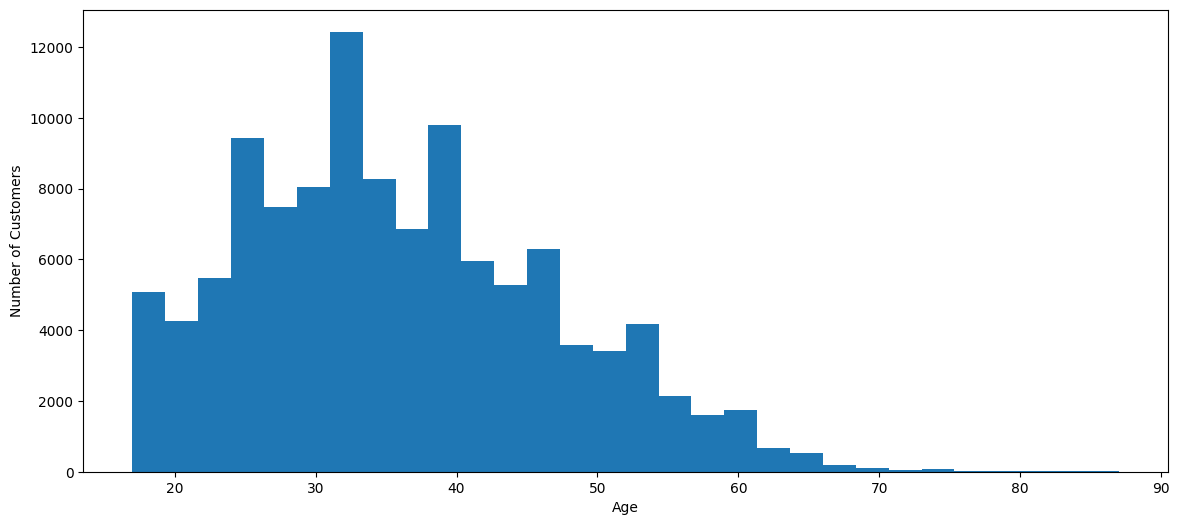

In [129]:
ax = sales['customer_age'].plot(kind='hist',    # тип діаграми hist
                                bins=30,        # кількість стовпчиків
                                figsize=(14,6)  # розмір зображення(в дюймах)
                               )


ax.set_ylabel('Number of Customers')
ax.set_xlabel('Age')

Вищенаведена гістограма є прикладом _поганих_ даних. Більшість алгоритмів ШІ вимагають щоб дані були _нормально розподілені_.

**Центральна гранична теорема:**
Сума деякої кількості незалежних і однаково розподілених випадкових величин із скінченною дисперсією буде прямувати до нормального розподілу із збільшенням кількості цих величин.

Через те, що на більшість числових величин впливає велика кількість _незалежних факторів_, умови теореми доволі часто виконуються.

В даному прикладі ми використовуємо згенеровані дані за допомогою `numpy`

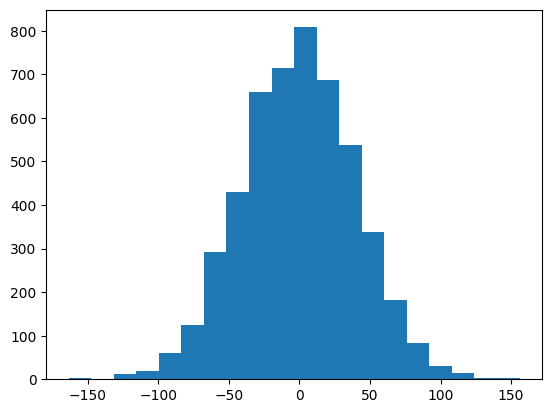

In [130]:
norm_data = np.random.normal(loc=0,      # середнє арифметичне
                             scale=40,   # стандартне відхилення
                             size=(5000,))

plt.hist(norm_data, bins=20)
plt.show()

Ящик з вусами `boxplot` показує взаємне розташування усіх квантилів(включно з медіаною), та дозволяє визначити викиди

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201127012952/boxplot.png">

<Axes: >

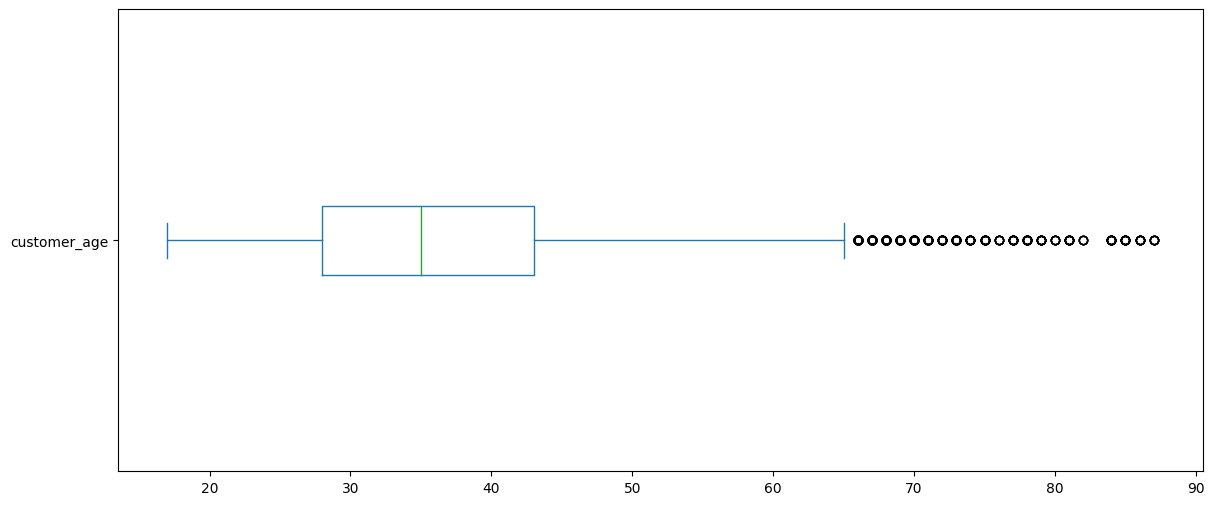

In [131]:
sales['customer_age'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

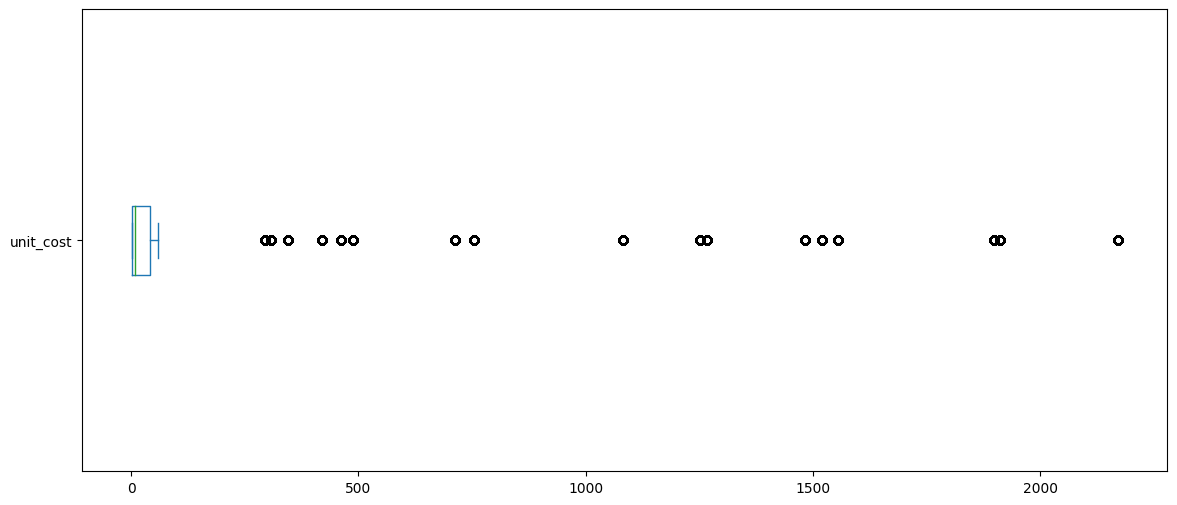

In [132]:
sales['unit_cost'].plot(kind='box', vert=False, figsize=(14,6))

### Очищення від викидів

Існує бізліч алгоритмів для виявлення викидів(деякі з них вимагають умову нормальності даних), проте найбільш універсальним є квантильний аналіз:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Очислюємо значення `IQR = q3 - q1`
3. Обчислюємо `lower = q1 - 1.5*IQR`
4. Обчислюємо `upper = q3 + 1.5*IQR`
5. Викидами вважаємо значення які `< lower` або `>upper`

Після очищення даних потрібно **обов'язково** перевірити їхню кількість

#### Варіант 1
Знаходими викиди для першого стовпчика, очищуємо і переходимо до наступного

In [133]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]


In [134]:
sales1 = sales.copy()

for column_name in sales1.columns:
  if sales1.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  sales1 = remove_outliers(sales1, column_name)

sales1.shape


(67414, 17)

#### Варіант 2
Змінюємо коефіцієнт при `iqr` на 3

In [135]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 3*iqr # замінити 1,5 на 3
  upper = q3 + 3*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

In [136]:
sales2 = sales.copy()

for column_name in sales2.columns:
  if sales2.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  sales2 = remove_outliers(sales1, column_name)


sales2.shape

(67414, 17)

#### Варіант 3
Спочатку знаходими викиди для всіх стовпчиків і лише потім очищуємо дані

In [137]:
sales3 = sales.copy()

In [138]:
# вибираємо стовпчики з числовими ознаками
num_columns = sales3.select_dtypes(include="number").columns

sales_num = sales3[num_columns]

In [139]:
q1 = sales_num.quantile(q=0.25)
q3 = sales_num.quantile(q=0.75)

iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

mask = (sales_num >= lower) & (sales_num <= upper)
mask = mask.all(axis=1)   # включаємо лише ті рядки, де немає викиду по жодному стовпчику

cleaned_sales = sales3[mask]

In [140]:
cleaned_sales.shape

(85008, 17)

In [141]:
sales = cleaned_sales

<Axes: >

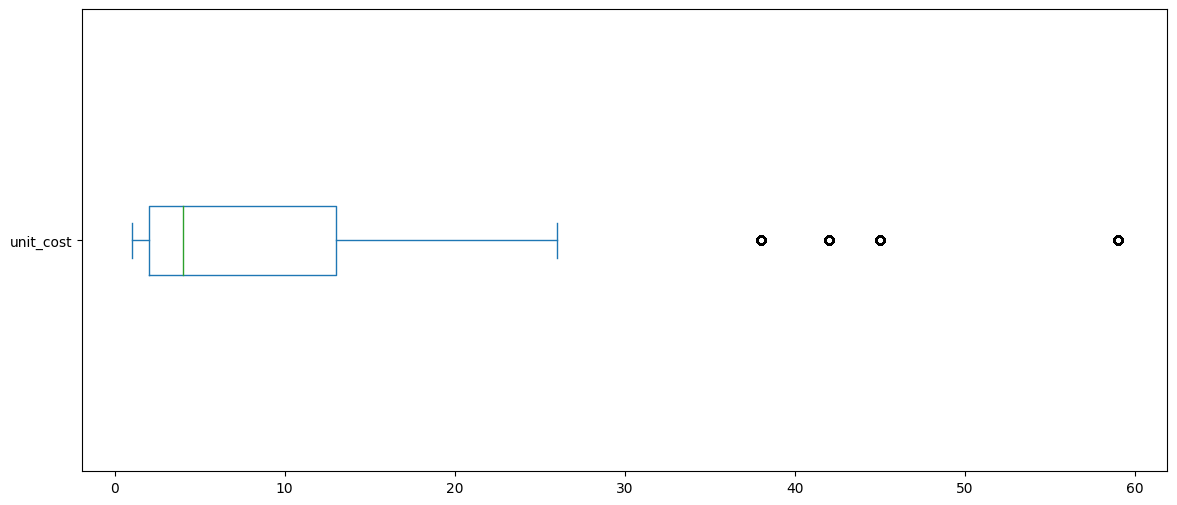

In [142]:
sales['unit_cost'].plot(kind='box', vert=False, figsize=(14,6))

## Аналіз категоріальних ознак

In [143]:
sales.head()

,date,day,month,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
4,2014-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379


In [144]:
sales['age_group'].value_counts()

Adults (35-64)          42246
Young Adults (25-34)    28355
Youth (<25)             14233
Seniors (64+)             174
Name: age_group, dtype: int64

<Axes: ylabel='age_group'>

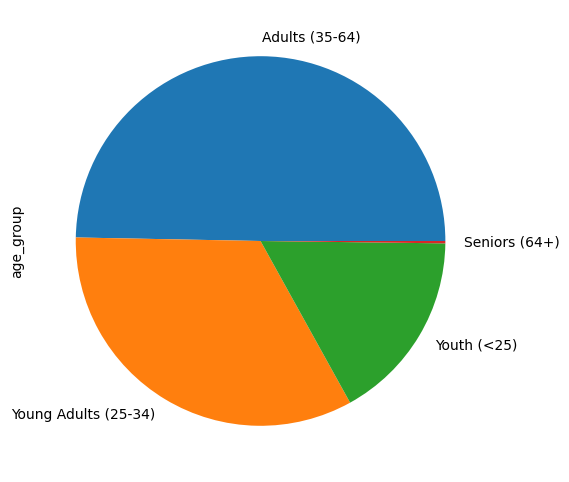

In [145]:
sales['age_group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

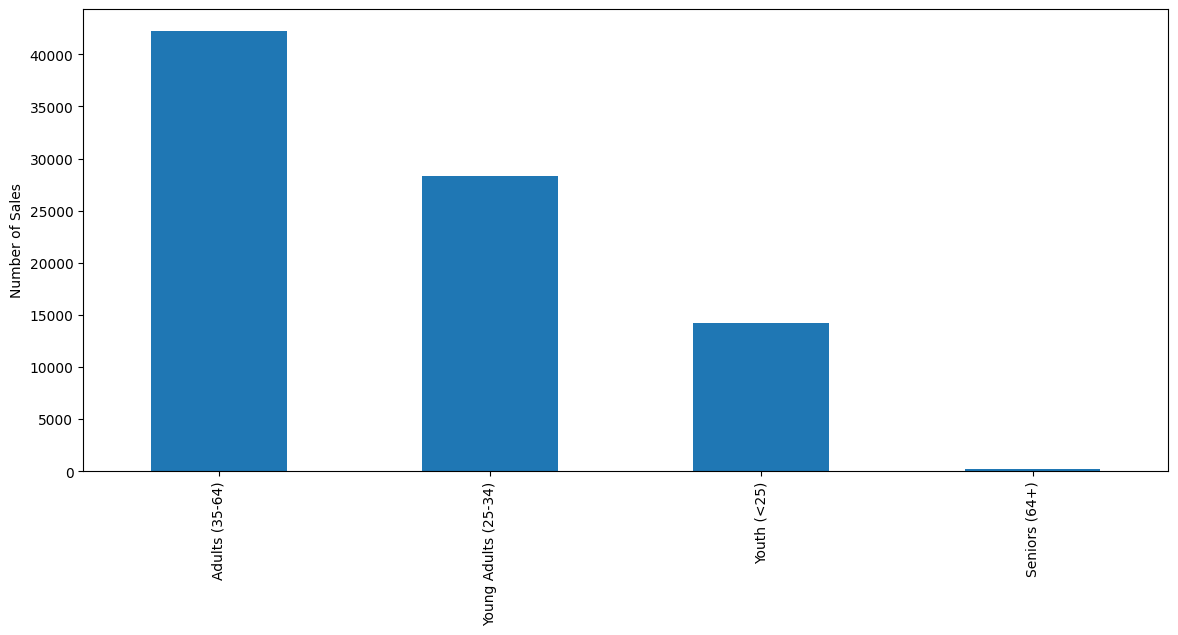

In [146]:
ax = sales['age_group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

In [147]:
sales.describe(include="object")

,month,age_group,customer_gender,country,state,product_category,sub_category,product
count,85008,85008,85008,85008,85008,85008,85008,85008
unique,12,4,2,6,52,2,14,42
top,December,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,8204,42246,44147,30376,17019,69481,33608,10764




## Залежність між різними ознаками

### Кореляція
Коефіцієнт кореляції Пірсона вимірює лінійну залежність між двома наборами даних. Вимірюється в межех [-1, 1], де 1 - позитивна залежність, -1 - негативна, 0 - відсутність кореляції.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png">

In [148]:
corr = sales.corr(method='pearson')

corr

<ipython-input-148-6de0a335bf34>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr(method='pearson')


,day,customer_age,order_quantity,unit_cost,unit_price,profit,cost,revenue
day,1.000000,-0.013578,-0.002707,-0.000381,0.004483,0.005212,-0.001651,0.001884
customer_age,-0.013578,1.000000,0.013339,0.022410,0.031919,0.045613,0.033750,0.043963
order_quantity,-0.002707,0.013339,1.000000,-0.115763,-0.119827,0.400423,0.335141,0.408088
unit_cost,-0.000381,0.022410,-0.115763,1.000000,0.903372,0.390650,0.740797,0.634014
unit_price,0.004483,0.031919,-0.119827,0.903372,1.000000,0.586022,0.630243,0.676903
profit,0.005212,0.045613,0.400423,0.390650,0.586022,1.000000,0.616964,0.893740
cost,-0.001651,0.033750,0.335141,0.740797,0.630243,0.616964,1.000000,0.904438
revenue,0.001884,0.043963,0.408088,0.634014,0.676903,0.893740,0.904438,1.000000


**Візуалізація**

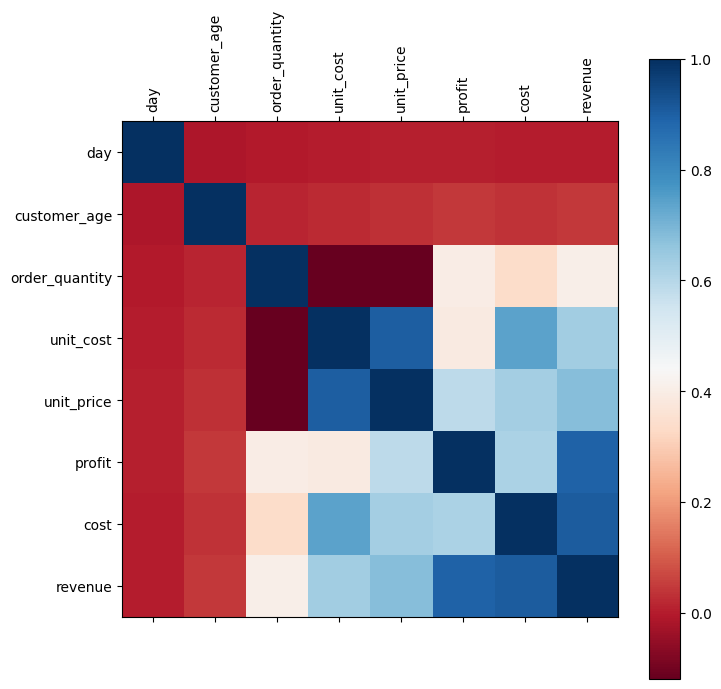

In [149]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

Для виявлення будь-якої зростаючої або спадаючої залежності є коефіцієнт кореляції Спірмена

In [150]:
x = np.random.random(size=(100,))

df = pd.DataFrame({'x': x,
                   'x^4': x**4})

print(f"pearson  \n{df.corr(method='pearson')}")
print()
print(f"spearman \n{df.corr(method='spearman')}")

pearson  
            x       x^4
x    1.000000  0.859936
x^4  0.859936  1.000000

spearman 
       x  x^4
x    1.0  1.0
x^4  1.0  1.0


<ipython-input-151-5d0451e66a79>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr(method='spearman')


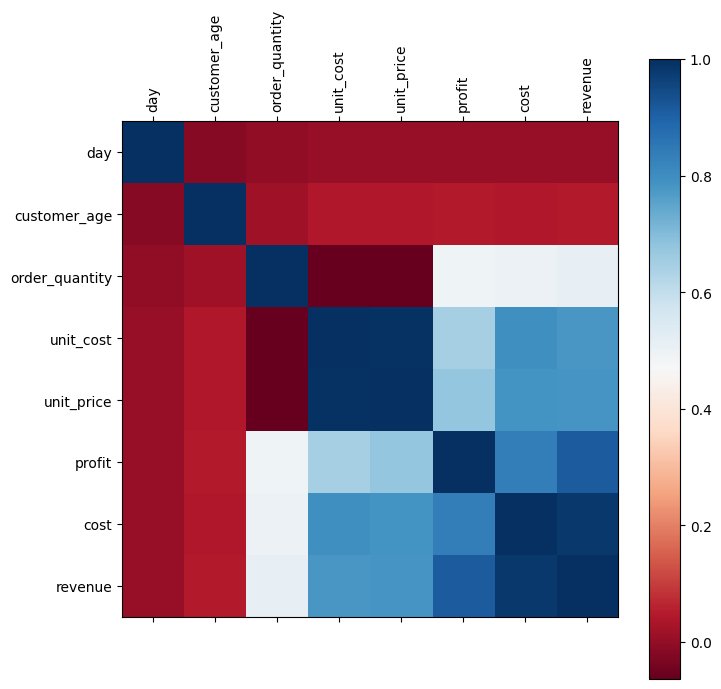

In [151]:
corr = sales.corr(method='spearman')

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

### Точкові діаграми
Зображення двох характеристик як координат точок

<Axes: xlabel='customer_age', ylabel='revenue'>

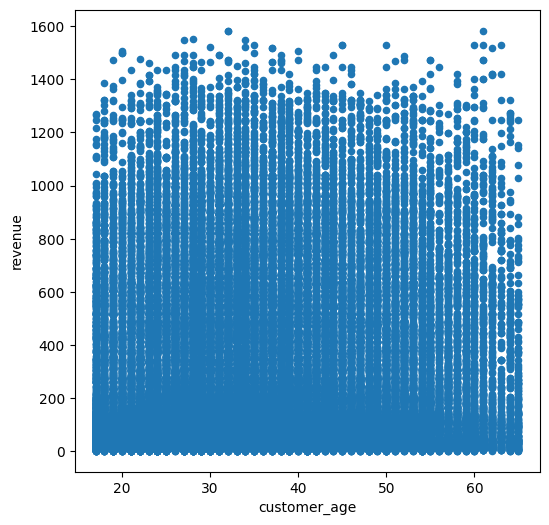

In [152]:
sales.plot(kind='scatter', x='customer_age', y='revenue', figsize=(6,6))

<Axes: xlabel='revenue', ylabel='profit'>

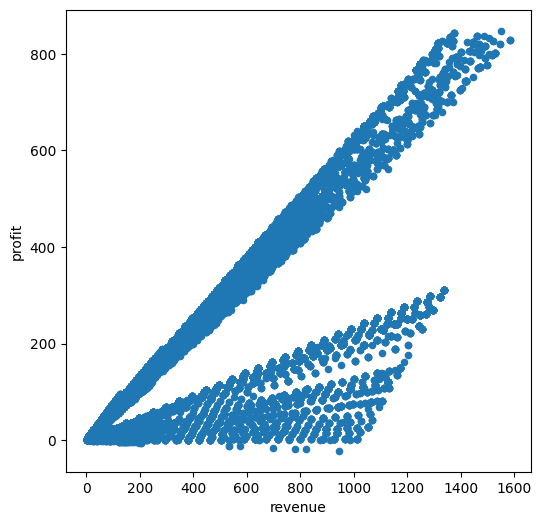

In [153]:
sales.plot(kind='scatter', x='revenue', y='profit', figsize=(6,6))

### Групові ящики з вусами
Зображають декілька ящиків з вусами одної(числової) характеристики, згрупованих за значенням іншої(категоріальної) характеристики

In [154]:
sales

,date,day,month,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
4,2014-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


Text(0, 0.5, 'profit')

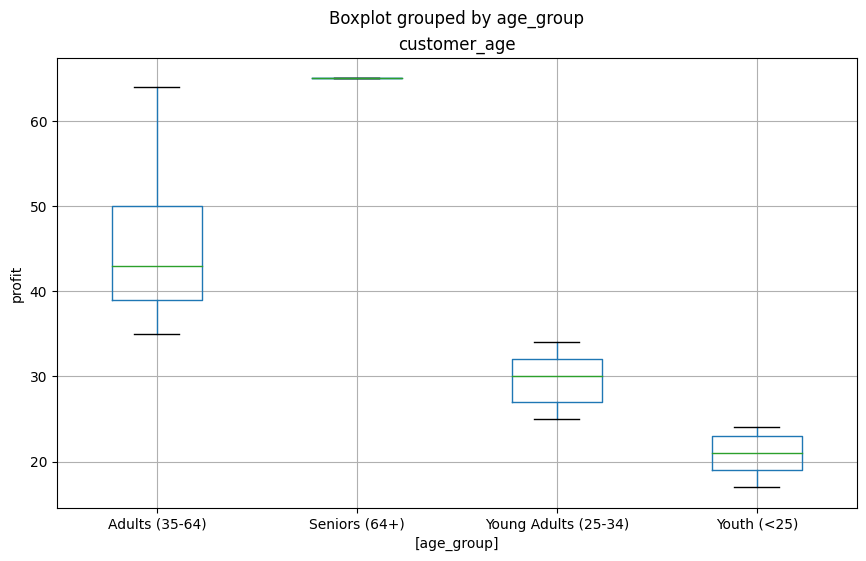

In [155]:
ax = sales[['customer_age', 'age_group']].boxplot(by='age_group', figsize=(10,6))
ax.set_ylabel('profit')